In [ ]:
pip install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100.1 MB 27 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566186 sha256=093c258d1ee8da912813dc00368b0e77416e42a59cff77d1414d64b2a6848674
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [ ]:
#@title Import Library
import cv2
from google.colab.patches import cv2_imshow
import keras
import face_recognition

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

import os
import tensorflow as tf
import tensorflow_hub as hub

import os

In [ ]:
load_saved_model = ('/content/drive/MyDrive/Liveness/Model/best_model.h5')
liveness_model = tf.keras.models.load_model(str(load_saved_model),
                                            custom_objects = {'KerasLayer':hub.KerasLayer})

In [ ]:
from google.colab import files
uploaded = files.upload()

MessageError: ignored

In [ ]:
#@title Camera
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


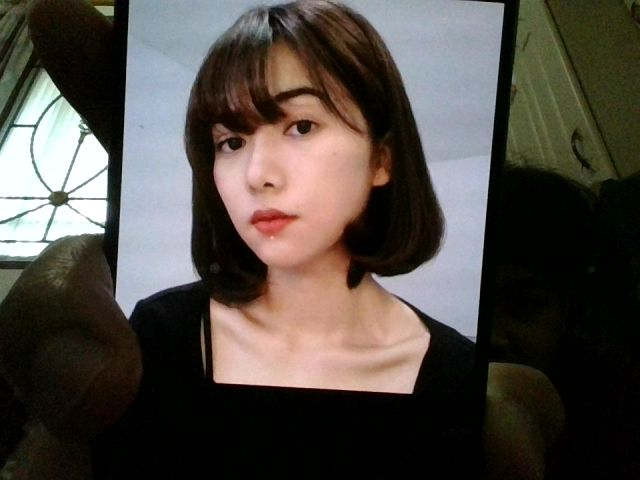

In [ ]:
#@title Open Camera
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

klsmdfs.jpg


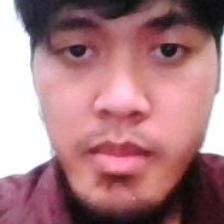

{'This image is 99.97 percent Fake and 0.03 percent Real.'}
--- 0.27721738815307617 seconds ---


isyana.jpg


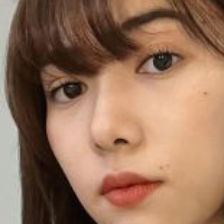

{'This image is 0.09 percent Fake and 99.91 percent Real.'}
--- 0.22763490676879883 seconds ---


jelek.jpg


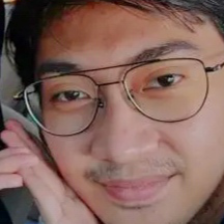

{'This image is 1.15 percent Fake and 98.85 percent Real.'}
--- 0.1847057342529297 seconds ---


kjh.jpg


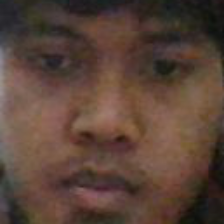

{'This image is 98.14 percent Fake and 1.86 percent Real.'}
--- 0.28920888900756836 seconds ---


IMG_20220722_160321.jpg


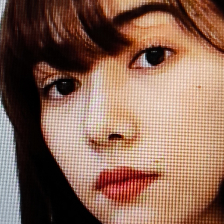

{'This image is 99.98 percent Fake and 0.02 percent Real.'}
--- 5.799348831176758 seconds ---


photo.jpg


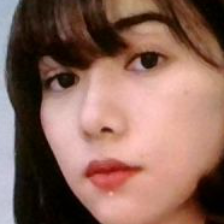

{'This image is 97.38 percent Fake and 2.62 percent Real.'}
--- 0.31321263313293457 seconds ---


jhvhjhvk.jpg


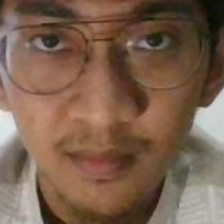

{'This image is 5.51 percent Fake and 94.49 percent Real.'}
--- 0.2880384922027588 seconds ---


ghhjgjl.jpg


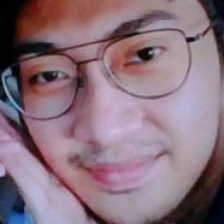

{'This image is 0.05 percent Fake and 99.95 percent Real.'}
--- 0.2972254753112793 seconds ---




In [ ]:
import time
items = os.listdir('/content')
#print (items)
s = 0
for each_image in items:
  if each_image.endswith(".JPG") or each_image.endswith(".jpg") or each_image.endswith(".png"):
    k = str(s)
    print (each_image)
    start_time = time.time()
    face_locations = [0]
    full_path = "/content/" + each_image
    '''#----------------------
    if not each_image.startswith("g"):
      re = cv2.imread(full_path)
      re = cv2.resize(image, (0,0),fx = 0.5, fy = 0.5)
      save = cv2.imwrite("g"+k+".jpg",re)
      s = s + 1
    '''#----------------------
    image = face_recognition.load_image_file(full_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    face_locations = face_recognition.face_locations(image)
    
    if not face_locations:

      show = cv2_imshow(image)
      print("--- %s seconds ---" % (timeused))
      print("\n")

    else :

      y=face_locations[0][0]
      x=face_locations[0][3]
      h=face_locations[0][2]
      w=face_locations[0][1]
      crop = image[y:h, x:w]

      resized = cv2.resize(crop, (224,224))
      img = img_to_array(resized)
      img = img/255
      img = img.reshape(1,224,224,3)


    
      #resized = cv2.resize(img, (224,224), interpolation = cv2.INTER_AREA)
      show = cv2_imshow(resized)
      #result = covid_model.predict(img)
      #kelas = classes
      #print(result[0])
      pred = liveness_model.predict(img)
      #result = np.argmax(pred)

      
      prediction = {
      "This image is %.2f percent Fake and %.2f percent Real."
      % (100 * pred, 100 * (1 - pred)) }
      
      timeused = time.time()-start_time
      print(prediction)
      print("--- %s seconds ---" % (timeused))
      print("\n")

In [ ]:

image = face_recognition.load_image_file("/content/test2.JPG")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
face_locations = face_recognition.face_locations(image)

y=face_locations[0][0]
x=face_locations[0][3]
h=face_locations[0][2]
w=face_locations[0][1]
crop = image[y:h, x:w]

resized = cv2.resize(crop, (224,224))
img = img_to_array(resized)
img = img/255
img = img.reshape(1,224,224,3)


IndexError: ignored

In [ ]:
cv2_imshow(resized)

In [ ]:
pred = liveness_model.predict(img)
    #result = np.argmax(pred)

    
prediction = {
    "This image is %.2f percent REAL and %.2f percent FAKE."
    % (100 * (1 - pred), 100 * pred) }   

print(prediction)
print("\n")

{'This image is 2.07 percent REAL and 97.93 percent FAKE.'}


